# iNeuron Internship
##### Submitted by - SHRUTI KHANDELWAL

## Project Title:    Amazon Sales Data Analysis
## Technologies:  Business Intelligence
## Domain:  E-commerce
## Difficulty Level:  Advanced

#### PROBLEM STATEMENT

Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business enterprise.

Do ETL : Extract-Transform-Load some Amazon dataset and find Sales-trend -> month wise , year wise , yearly_month wise.

Find key metrics and factors and show the meaningful relationships between attributes.


#### DATA COLLECTION

Dataset taken from iNeuron Portal Link - https://drive.google.com/drive/folders/1FkmFVL8wlJmQWP1z52TD8PlhOJhitTyI?usp=sharing

#### Importing Libraries

In [1]:
import pandas as pd #Data Manipulation and Analysis
import numpy as np #Numerical Computing
import matplotlib.pyplot as plt  #Data Visualization
%matplotlib inline
import seaborn as sns  #Data Visualization

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
sales = pd.read_csv(r'C:\Users\USER\Downloads\iNeuron Amazon Sales Data Analysis\Dataset\SALESDATA.csv')
sales.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,10000481.0,4/30/2017,-237.91,2017/04/30,100012.0,NaN,NaN,Urban Large Eggs,2000.0,0.00,...,0.0,237.91,237.910000,1.0,184.0,EA,NaN,U/M = unit of measure,NaN,NaN
1,10002220.0,7/14/2017,368.79,2017/07/14,100233.0,P01,20910,Moms Sliced Turkey,1000.0,824.96,...,0.0,456.17,456.170000,1.0,127.0,EA,NaN,NaN,NaN,NaN
2,10002220.0,10/17/2017,109.73,2017/10/17,116165.0,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000.0,548.66,...,0.0,438.93,438.930000,1.0,127.0,EA,NaN,EA = each,NaN,NaN
3,10002489.0,6/3/2017,-211.75,2017/06/03,100096.0,NaN,NaN,Kiwi Lox,1000.0,0.00,...,0.0,211.75,211.750000,1.0,160.0,EA,NaN,NaN,NaN,NaN
4,10004516.0,5/27/2017,96627.94,2017/05/27,103341.0,P01,60776,High Top Sweet Onion,1000.0,408.52,...,0.0,89248.66,196.150901,455.0,124.0,SE,NaN,SE = some SI unit like kgs or gallons,NaN,NaN


In [3]:
#Checking the total amount of rows and columns
sales.shape

(65535, 24)

In [4]:
#Information about the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  float64
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  float64
 5   Item Class                        56993 non-null  object 
 6   Item Number                       65241 non-null  object 
 7   Item                              65282 non-null  object 
 8   Line Number                       65282 non-null  float64
 9   List Price                        65282 non-null  float64
 10  Order Number                      65282 non-null  float64
 11  Promised Delivery Date            65282 non-null  object 
 12  Sale

In [5]:
#Dropping unnecessary columns
sales = sales.drop(columns=['Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','DateKey','Item Class','Item Number','Line Number','Order Number','Invoice Number'], axis=1)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  float64
 1   Discount Amount                   65280 non-null  float64
 2   Invoice Date                      65282 non-null  object 
 3   Item                              65282 non-null  object 
 4   List Price                        65282 non-null  float64
 5   Promised Delivery Date            65282 non-null  object 
 6   Sales Amount                      65282 non-null  float64
 7   Sales Amount Based on List Price  65282 non-null  float64
 8   Sales Cost Amount                 65282 non-null  float64
 9   Sales Margin Amount               65282 non-null  float64
 10  Sales Price                       65281 non-null  float64
 11  Sales Quantity                    65282 non-null  float64
 12  Sale

In [6]:
#Changing data types of Date columns
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'])
sales['Promised Delivery Date'] = pd.to_datetime(sales['Promised Delivery Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  float64       
 1   Discount Amount                   65280 non-null  float64       
 2   Invoice Date                      65282 non-null  datetime64[ns]
 3   Item                              65282 non-null  object        
 4   List Price                        65282 non-null  float64       
 5   Promised Delivery Date            65282 non-null  datetime64[ns]
 6   Sales Amount                      65282 non-null  float64       
 7   Sales Amount Based on List Price  65282 non-null  float64       
 8   Sales Cost Amount                 65282 non-null  float64       
 9   Sales Margin Amount               65282 non-null  float64       
 10  Sales Price                       65281 non-nu

In [7]:
#Removing null rows
sales = sales.dropna(axis=0)
sales.isnull().sum()

CustKey                             0
Discount Amount                     0
Invoice Date                        0
Item                                0
List Price                          0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [8]:
sales['Invoice Year'] = pd.to_datetime(sales['Invoice Date']).dt.year
sales['Invoice Month'] = pd.to_datetime(sales['Invoice Date']).dt.month
sales['Invoice Quarter'] = pd.to_datetime(sales['Invoice Date']).dt.quarter
sales['Invoice Day'] = pd.to_datetime(sales['Invoice Date']).dt.day

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65280 entries, 0 to 65281
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65280 non-null  float64       
 1   Discount Amount                   65280 non-null  float64       
 2   Invoice Date                      65280 non-null  datetime64[ns]
 3   Item                              65280 non-null  object        
 4   List Price                        65280 non-null  float64       
 5   Promised Delivery Date            65280 non-null  datetime64[ns]
 6   Sales Amount                      65280 non-null  float64       
 7   Sales Amount Based on List Price  65280 non-null  float64       
 8   Sales Cost Amount                 65280 non-null  float64       
 9   Sales Margin Amount               65280 non-null  float64       
 10  Sales Price                       65280 non-nu

In [10]:
sales.head()

,CustKey,Discount Amount,Invoice Date,Item,List Price,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Invoice Year,Invoice Month,Invoice Quarter,Invoice Day
0,10000481.0,-237.91,2017-04-30,Urban Large Eggs,0.00,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1.0,184.0,EA,2017,4,2,30
1,10002220.0,368.79,2017-07-14,Moms Sliced Turkey,824.96,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1.0,127.0,EA,2017,7,3,14
2,10002220.0,109.73,2017-10-17,Cutting Edge Foot-Long Hot Dogs,548.66,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1.0,127.0,EA,2017,10,4,17
3,10002489.0,-211.75,2017-06-03,Kiwi Lox,0.00,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1.0,160.0,EA,2017,6,2,3
4,10004516.0,96627.94,2017-05-27,High Top Sweet Onion,408.52,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455.0,124.0,SE,2017,5,2,27


<Axes: >

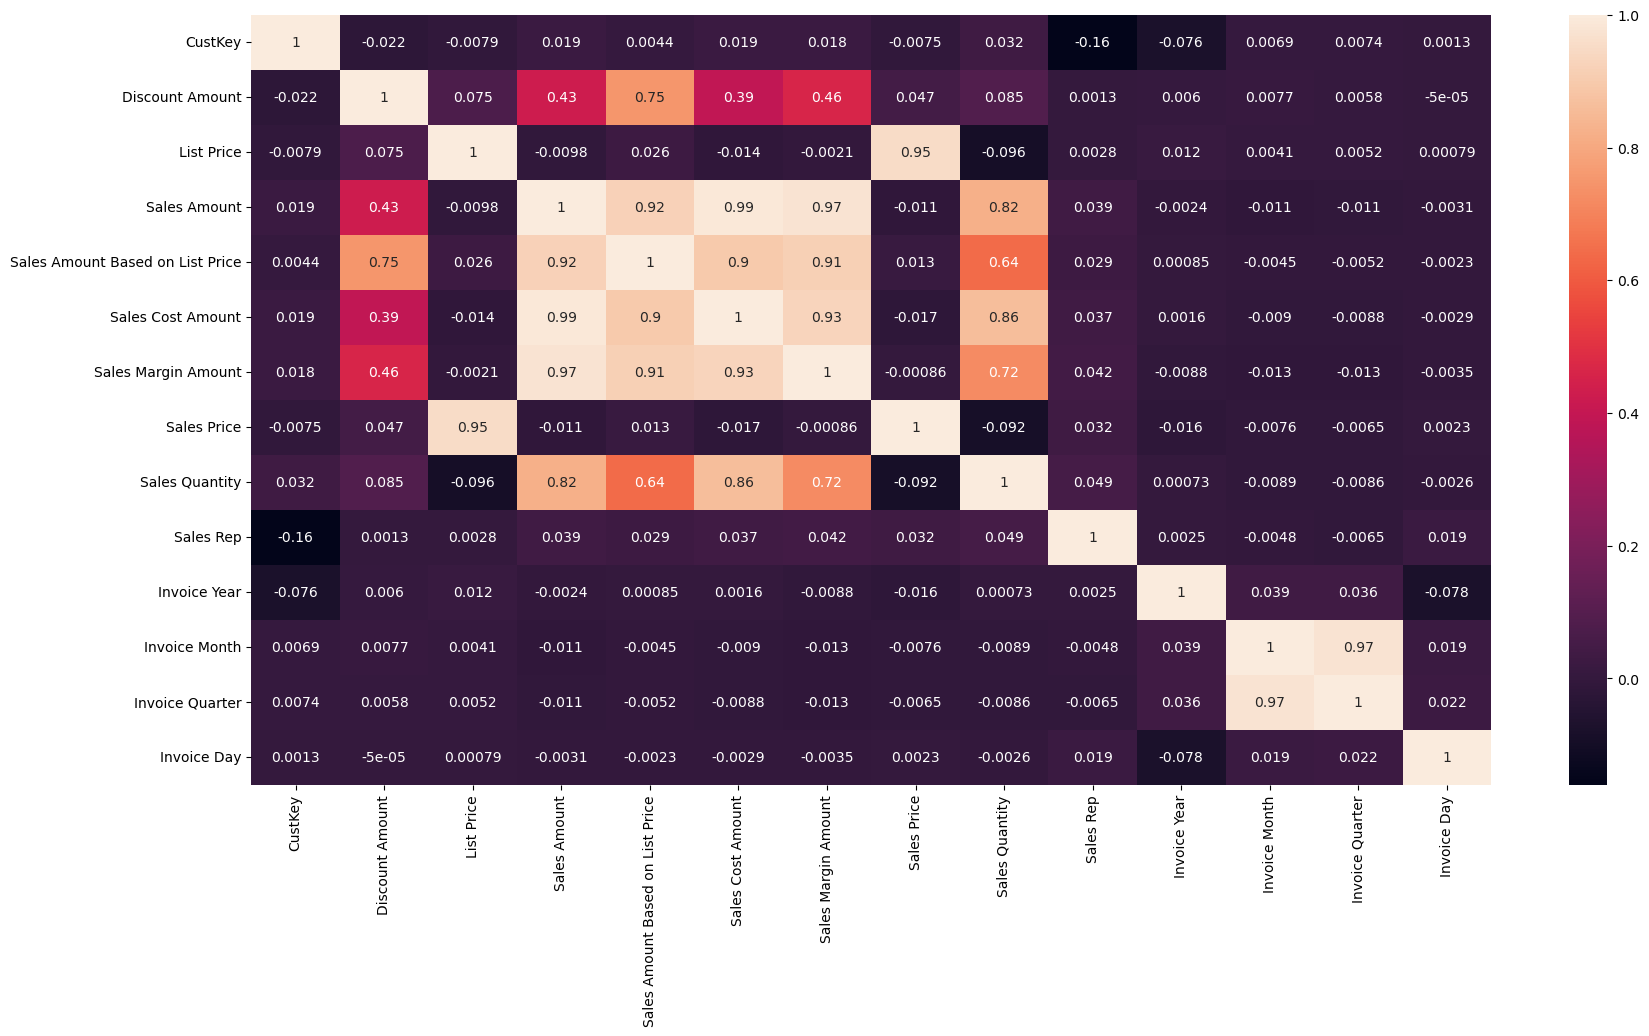

In [11]:
#Checking correlation between columns
plt.figure(figsize = (20,10))
sns.heatmap(sales.corr(), annot=True)

In [12]:
sales.to_csv('CleanedAmazonSalesData.csv')